NV-spin 경로 시각화 하는 코드

In [1]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.linalg import fractional_matrix_power
import cmath

In [2]:
# complex number
# j = (-1)**0.5
 

# pauli matrix
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])
s0 = np.array([[1, 0], [0, 1]])

# Detunning Factor
d0 = 0.15
v0 = 0.02

In [3]:
def Rx(theta):
    return np.matrix([[cos(theta/2),     -1j*sin(theta/2)],
                    [-1j*sin(theta/2),     cos(theta/2)]])

def Rz(phi): # Rz는 사용하지 않음. 해밀토니안에 의한 회전으로만 컨트롤
    return np.matrix([[cos(phi/2)-1j*sin(phi/2),       0],
                     [0,                          cos(phi/2)+1j*sin(phi/2)]])

In [4]:
def unitary(dt, choice) :
    choice_list = [0,1,-1,1,-1] # x,y-rotiation 방향 선택
    if choice <3 :
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else :
        Ham = (d0*sz+v0*choice_list[choice]*sy)
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    return U_e

In [5]:
def state_fidelity(rho_1, rho_2): 
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


In [6]:
dt = 2.6
target_theta, target_phi, combi=	1.2735937,1.22229083,[1, 1 ,3 ,3 ,2 ,2 ,4 ,1, 1 ,3, 3 ,3, 2, 2, 4, 4, 1 ,3]
print(len(combi))


dt*len(combi)

18


46.800000000000004

In [7]:
init_wave = np.array([[1],[0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

target_U = Rz(target_phi) @ Rx(target_theta)
irho_target = target_U @ irho_init @target_U.conj().T


# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [8]:
k=50
combination = []
for i in combi :
    combination += [i for j in range(k)]
print(combination)

dt = dt/k

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

[1.622366513073733e-05, -0.002079914136444701, 0.9999978368446486]
0.6467698557369992
[6.489064222470832e-05, -0.004159313117077857, 0.9999913479143687]
0.647130271906711
[0.00014598887738235964, -0.00623768191368238, 0.9999805348163472]
0.6475044396430607
[0.00025949828408838025, -0.00831450575319849, 0.9999654002287857]
0.6478922969276476
[0.00040539074818675517, -0.010389270245223362, 0.9999459479002387]
0.6482937194231365
[0.0005836301348441163, -0.01246146150941602, 0.9999221826486838]
0.6487086465646604
[0.0007941722974996639, -0.014530566302775865, 0.999894110360329]
0.6491369517295233
[0.001036965088799444, -0.016596072146763362, 0.9998617379881551]
0.6495785092923356
[0.0013119483735122726, -0.018657467454231406, 0.9998250735501929]
0.6500332480796772
[0.0016190540434241059, -0.020714241656135852, 0.9997841261275375]
0.650501038038358
[0.0019582060342071715, -0.022765885327993948, 0.9997389058620991]
0.6509817723436995
[0.0023293203442596787, -0.024811890316059224, 0.999689423

0.6616963557618949
[0.014332361187150595, -0.060107358582622394, 0.9980890185083621]
0.6623968097127425
[0.015284446009596886, -0.06195227870284885, 0.9979620738653685]
0.6631072263228673
[0.016265192491035807, -0.06378185440291254, 0.9978313076678428]
0.6638274565869714
[0.01727435771891597, -0.06559563253114817, 0.9976967523041249]
0.6645573308343736
[0.018311691741894263, -0.06739316384865343, 0.9975584411010605]
0.6652966627794222
[0.01937693763174414, -0.069174003140557, 0.9974164083157465]
0.6660452626838435
[0.020469831546991932, -0.07093770932628993, 0.9972706891270463]
0.6668029590092436
[0.02159010279826542, -0.07268384556883306, 0.9971213196268759]
0.6675695405175548
[0.022737473915338566, -0.0744119793829134, 0.9969683368112655]
0.668344834476541
[0.023911660715855664, -0.07612168274212265, 0.9968117785711961]
0.6691286564609429
[0.025112372375718003, -0.07781253218493128, 0.9966516836832139]
0.6699207936016849
[0.02633931150111556, -0.07948410891957203, 0.9964880917998269]

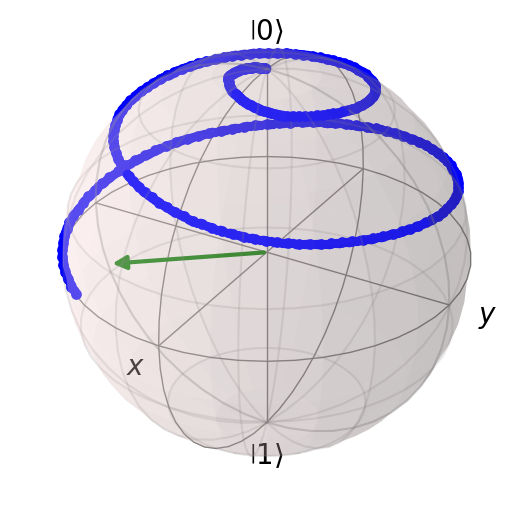

In [9]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list =[]
z=[]
y=[]
for i in combination:
    instant_U = unitary(dt,i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid*sx).real,
             np.trace(irho_mid*sy).real,
             np.trace(irho_mid*sz).real]
    b.add_points(point,'m')
    print(point)
    z.append(np.trace(irho_mid*sz).real)
    y.append(np.trace(irho_mid*sy).real)
    point_list.append(point)
    print(state_fidelity(irho_target,irho_mid))
vector = np.array([np.trace(irho_target*sx).real,
             np.trace(irho_target*sy).real,
             np.trace(irho_target*sz).real])
print(state_fidelity(irho_target,irho_mid))
b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
#b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [10]:
state_fidelity(irho_mid,irho_target)

0.9612691963667411